#سوال 1

##Part1

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import itertools
from sklearn.metrics import classification_report
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

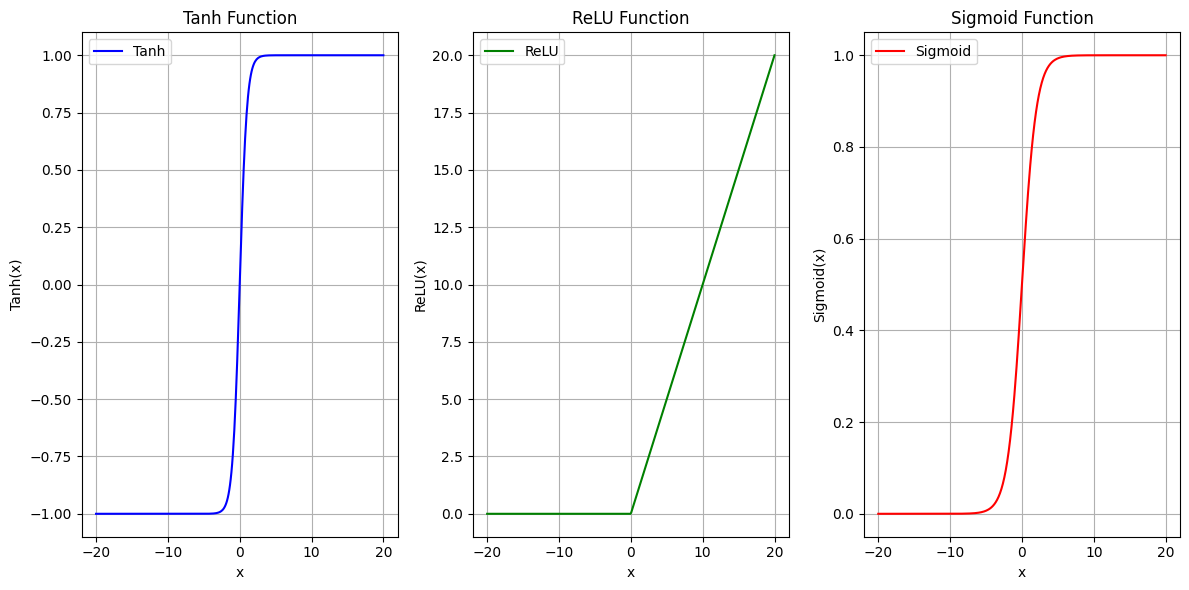

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Tanh function
def tanh(x):
    return np.tanh(x)

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values from -20 to 20 for x
x = np.linspace(-20, 20, 400)

# Compute the Tanh, ReLU, and Sigmoid values
y_tanh = tanh(x)
y_relu = relu(x)
y_sigmoid = sigmoid(x)

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting Tanh
plt.subplot(1, 3, 1)
plt.plot(x, y_tanh, label="Tanh", color='blue')
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("Tanh(x)")
plt.grid(True)
plt.legend()

# Plotting ReLU
plt.subplot(1, 3, 2)
plt.plot(x, y_relu, label="ReLU", color='green')
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.legend()

# Plotting Sigmoid
plt.subplot(1, 3, 3)
plt.plot(x, y_sigmoid, label="Sigmoid", color='red')
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

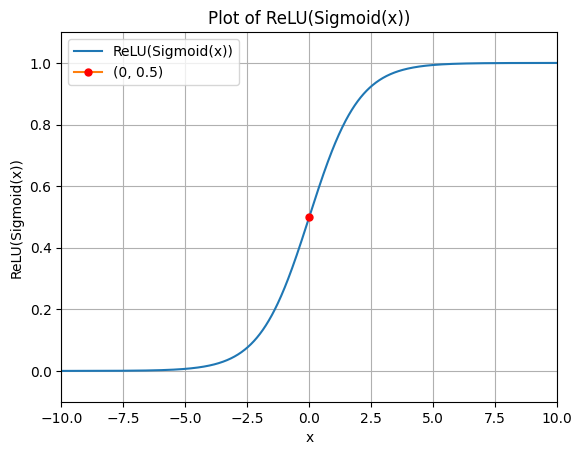

In [ ]:
# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values from -10 to 10 for x
x_4 = np.linspace(-10, 10, 1000)

# Plotting ReLU after Sigmoid
plt.plot(x_4, relu(sigmoid(x_4)), markeredgecolor="blue", markerfacecolor="blue", label="ReLU(Sigmoid(x))")
plt.plot(0, 0.5, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red", label="(0, 0.5)")
plt.xlabel("x")
plt.ylabel("ReLU(Sigmoid(x))")
plt.title("Plot of ReLU(Sigmoid(x))")
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
plt.legend()

# Show the plot
plt.show()

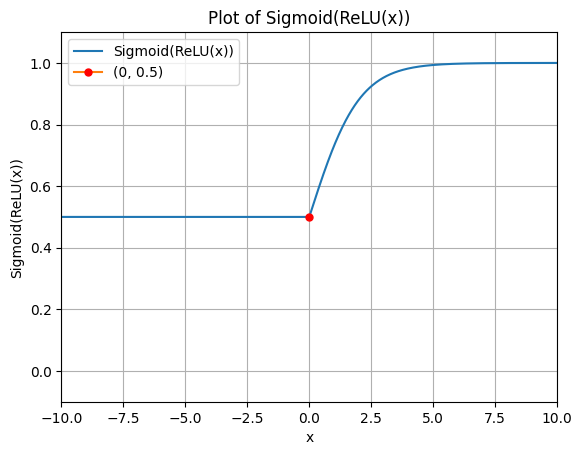

In [ ]:
def relu(x):
    return np.maximum(0, x)

# Define the Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values from -10 to 10 for x
x_4 = np.linspace(-10, 10, 1000)

# Plotting Sigmoid after ReLU
plt.plot(x_4, sigmoid(relu(x_4)), markeredgecolor="blue", markerfacecolor="blue", label="Sigmoid(ReLU(x))")
plt.plot(0, 0.5, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red", label="(0, 0.5)")
plt.xlabel("x")
plt.ylabel("Sigmoid(ReLU(x))")
plt.title("Plot of Sigmoid(ReLU(x))")
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
plt.legend()

# Show the plot
plt.show()

##Part2

#سوال3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import fetch_covtype

#download data
dataset = fetch_covtype()
dataset

{'data': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 'target': array([5, 5, 2, ..., 3, 3, 3], dtype=int32),
 'frame': None,
 'target_names': ['Cover_Type'],
 'feature_names': ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_0',
  'Wilderness_Area_1',
  'Wilderness_Area_2',

##بخش اول

In [ ]:
# Selecting needed elements
X = dataset['data']
y = dataset['target']
features = dataset['feature_names']

# pandas dataframe
df = pd.DataFrame(X, columns=features)
df['Target'] = y

print(f'The shape of the dataframe is: {df.shape}')

The shape of the dataframe is: (581012, 55)


بررسی بالانس بودن و نبودن و  بالانس کردن دیتاست در صورت نیاز :

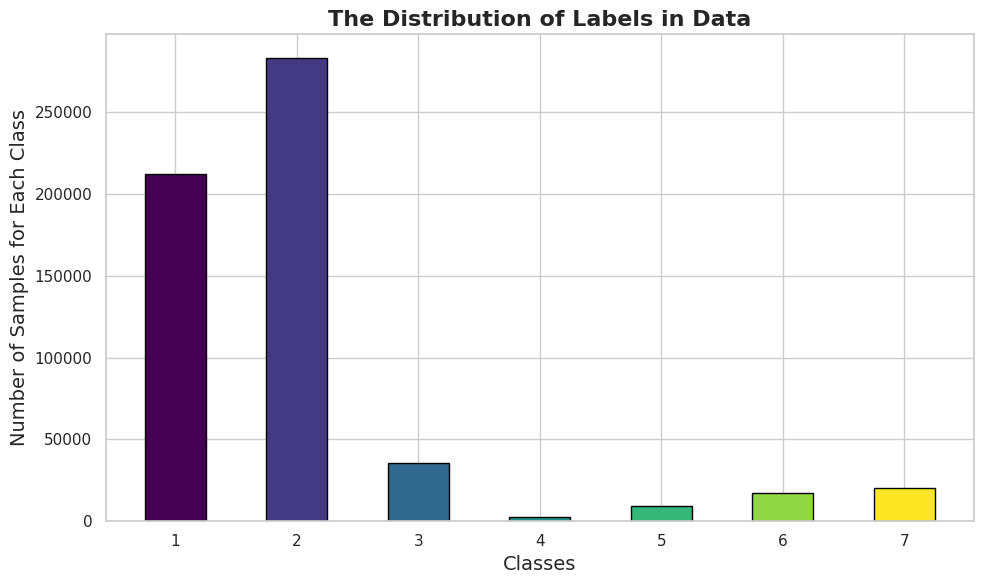

In [ ]:
hist, bins = np.histogram(y, bins=7)
bins = np.unique(y)

# Set the style
sns.set(style="whitegrid")

# Create the color map
cmap = cm.get_cmap('viridis')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bins, hist, width=0.5, edgecolor='black', color=cmap(np.linspace(0, 1, len(hist))))

# Add labels and title
plt.xticks(range(1, 8), range(1, 8))
plt.title('The Distribution of Labels in Data', fontsize=16, fontweight='bold')
plt.ylabel('Number of Samples for Each Class', fontsize=14)
plt.xlabel('Classes', fontsize=14)

# Enhance the plot aesthetics
plt.tight_layout()
plt.show()

In [ ]:
sampler = RandomUnderSampler(random_state=84)
x_resampled, y_resampled = sampler.fit_resample(X, y)

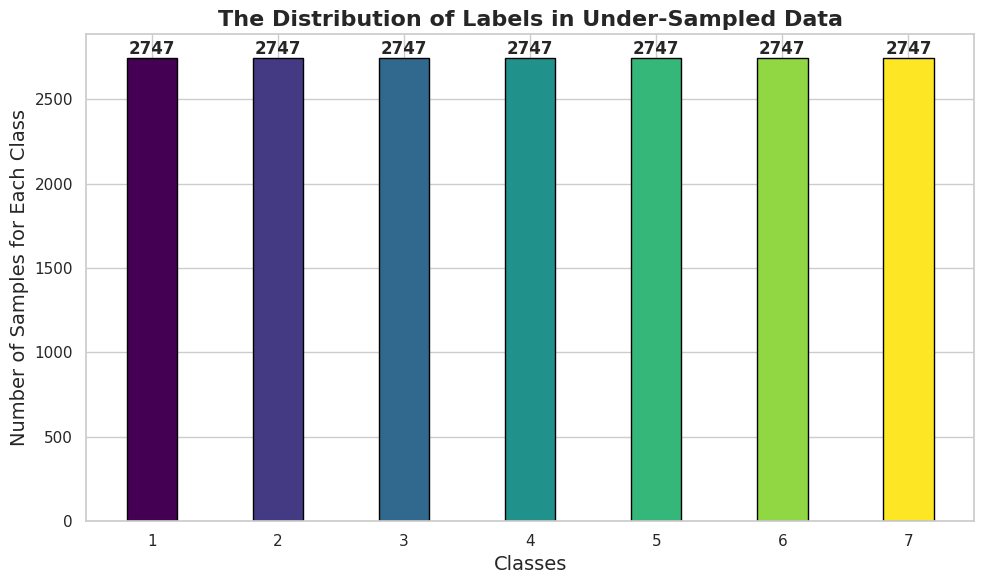

In [ ]:
hist, bins = np.histogram(y_resampled, bins=7)
bins = np.unique(y_resampled)

# Set the style
sns.set(style="whitegrid")

# Create the color map
cmap = cm.get_cmap('viridis')

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(bins, hist, width=0.4, edgecolor='black', color=cmap(np.linspace(0, 1, len(hist))))

# Add labels and title
plt.xticks(range(1, 8), range(1, 8))
plt.title('The Distribution of Labels in Under-Sampled Data', fontsize=16, fontweight='bold')
plt.ylabel('Number of Samples for Each Class', fontsize=14)
plt.xlabel('Classes', fontsize=14)

# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Enhance the plot aesthetics
plt.tight_layout()
plt.show()

In [ ]:
# Split resmapled data
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(
    x_resampled,
    y_resampled,
    random_state = 84,
    test_size = 0.15,
    shuffle = True
)

In [ ]:
# Split main data
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 84,
    test_size = 0.15,
    shuffle = True
)

In [ ]:
# scaler
scaler = StandardScaler()
scaler.fit(x_train)
# scaling datasets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

انتخاب بخشی از داده ها توسط 5 روش :

In [ ]:
dt = DecisionTreeClassifier(random_state=84 )
dt1 = clone(dt)
dt3 = clone(dt)
dt2 = clone(dt)

# With under-sampled data
dt.fit(x_train_r, y_train_r)
print(f'Model score for under-sampled data is: {dt.score(x_test_r, y_test_r):0.4f}', end='\n\n')

# With normal data
dt1.fit(x_train, y_train)
print(f'Model score for normal data is: {dt1.score(x_test, y_test):0.4f}', end='\n\n')

# With Weighted classes
weight = [
    len(y)/len(y[y==1]),
    len(y)/len(y[y==2]),
    len(y)/len(y[y==3]),
    len(y)/len(y[y==4]),
    len(y)/len(y[y==5]),
    len(y)/len(y[y==6]),
    len(y)/len(y[y==7])
]
w_train = [weight[a-1] for a in y_train]
w_test = [weight[a-1] for a in y_test]
dt2.fit(x_train, y_train, w_train)
print(f"The weight for each class is : {np.round(weight).astype('int16')}")
print(f'Model score for weighted data is: {dt2.score(x_test,y_test,w_test):0.4f}', end='\n\n')

# With K-fold method
kfold_score = cross_val_score(dt, X, y, cv=5)
print(f'Model score for 5-fold CV is : {np.mean(kfold_score):.4f} --> (mean value)', end='\n\n')

# Stratified K-fold model
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=84 )
fold_acc = {'train':[], 'val':[]}
fold_hat = {'train':[], 'val':[]}
fold_ground = {'train':[], 'val':[]}
fold_input = {'train':[], 'val':[]}
all_models = []

# Train model
for train_index, val_index in kf.split(x_train,y_train):

    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    fold_input['train'].append(X_train_fold)
    fold_input['val'].append(X_val_fold)
    fold_ground['train'].append(y_train_fold)
    fold_ground['val'].append(y_val_fold)

    # Train selected folds
    model = clone(dt3)
    model.fit(X_train_fold,y_train_fold)

    # Accuracy
    train_hat = model.predict(X_train_fold)
    fold_hat['train'].append(train_hat)
    train_hat = train_hat == y_train_fold
    train_score = np.sum(train_hat.astype('float64'))/len(y_train_fold)
    fold_acc['train'].append(train_score)

    val_hat = model.predict(X_val_fold)
    fold_hat['val'].append(val_hat)
    val_hat = val_hat == y_val_fold
    val_score = np.sum(val_hat.astype('float64'))/len(y_val_fold)
    fold_acc['val'].append(val_score)

    # Saving all models
    all_models.append(model)

skf_score = np.mean(fold_acc['val'])
print(f'Model score for Stratified 5-fold CV is {skf_score:0.4f} --> (mean value)')

Model score for under-sampled data is: 0.8014

Model score for normal data is: 0.9393

The weight for each class is : [  3   2  16 212  61  33  28]
Model score for weighted data is: 0.8920

Model score for 5-fold CV is : 0.5561 --> (mean value)

Model score for Stratified 5-fold CV is 0.9338 --> (mean value)


حالت دوم بهترین دقت را داشت (حالتی که از دیتا بدون هیچ کار اضافه استفاده کردیم)

In [ ]:
tree_ob = dt1.tree_

# max depth
md = tree_ob.max_depth
print(f'Max depth of the tree is {md}', end='\n\n')

# number of samples in the leaves
ns = tree_ob.n_node_samples[-1]
print(f'There are {ns} number of samples at leaves', end='\n\n')

# Impurity at leaves
i_in_leaf = tree_ob.impurity[-1]
print(f'Impurity at leaves is {i_in_leaf}')

Max depth of the tree is 44

There are 2 number of samples at leaves

Impurity at leaves is 0.0


[Text(0.6143890309959978, 0.9888888888888889, 'Elevation <= 3044.5\ngini = 0.623\nsamples = 493860\nvalue = [179844, 240831, 30509, 2354, 8033, 14784, 17505]\nclass = 2'),
 Text(0.31453825294231913, 0.9666666666666667, 'Elevation <= 2510.5\ngini = 0.553\nsamples = 286561\nvalue = [48893, 181917, 30509, 2354, 8033, 14784, 71]\nclass = 2'),
 Text(0.05581919136958949, 0.9444444444444444, 'Horizontal_Distance_To_Hydrology <= 15.0\ngini = 0.581\nsamples = 36451\nvalue = [11, 2837, 20935, 2352, 108, 10208, 0]\nclass = 3'),
 Text(0.011427666341069212, 0.9222222222222223, 'Wilderness_Area_2 <= 0.5\ngini = 0.714\nsamples = 2693\nvalue = [10, 232, 686, 966, 13, 786, 0]\nclass = 4'),
 Text(0.007516407080951145, 0.9, 'Elevation <= 2340.5\ngini = 0.65\nsamples = 1948\nvalue = [0, 169, 553, 966, 13, 247, 0]\nclass = 4'),
 Text(0.0033905342261536624, 0.8777777777777778, 'Hillshade_9am <= 194.5\ngini = 0.538\nsamples = 1449\nvalue = [0, 7, 432, 874, 0, 136, 0]\nclass = 4'),
 Text(0.0017347520520832895

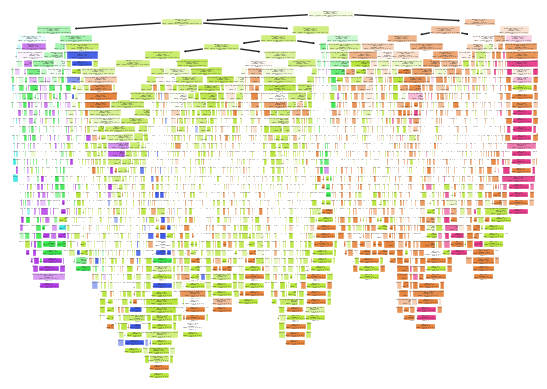

In [ ]:
plot_tree(dt1, filled=True, feature_names=dataset.feature_names, class_names=[str(i) for i in np.unique(y)])

[Text(0.5, 0.9166666666666666, 'Elevation <= 3044.5\ngini = 0.623\nsamples = 100.0%\nvalue = [0.364, 0.488, 0.062, 0.005, 0.016, 0.03, 0.035]'),
 Text(0.25, 0.75, 'Elevation <= 2510.5\ngini = 0.553\nsamples = 58.0%\nvalue = [0.171, 0.635, 0.106, 0.008, 0.028, 0.052, 0.0]'),
 Text(0.125, 0.5833333333333334, 'Horizontal_Distance_To_Hydrology <= 15.0\ngini = 0.581\nsamples = 7.4%\nvalue = [0.0, 0.078, 0.574, 0.065, 0.003, 0.28, 0.0]'),
 Text(0.0625, 0.4166666666666667, 'Wilderness_Area_2 <= 0.5\ngini = 0.714\nsamples = 0.5%\nvalue = [0.004, 0.086, 0.255, 0.359, 0.005, 0.292, 0.0]'),
 Text(0.03125, 0.25, 'Elevation <= 2340.5\ngini = 0.65\nsamples = 0.4%\nvalue = [0.0, 0.087, 0.284, 0.496, 0.007, 0.127, 0.0]'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'Soil_Type_3 <= 0.5\ngini = 0.437\nsamples = 0.2%\nvalue = [0.013, 0.085, 0.179, 0.0, 0.0, 0.723, 0.0]'),
 Text(0.078125, 0.08333333333333333, '\n  (...)

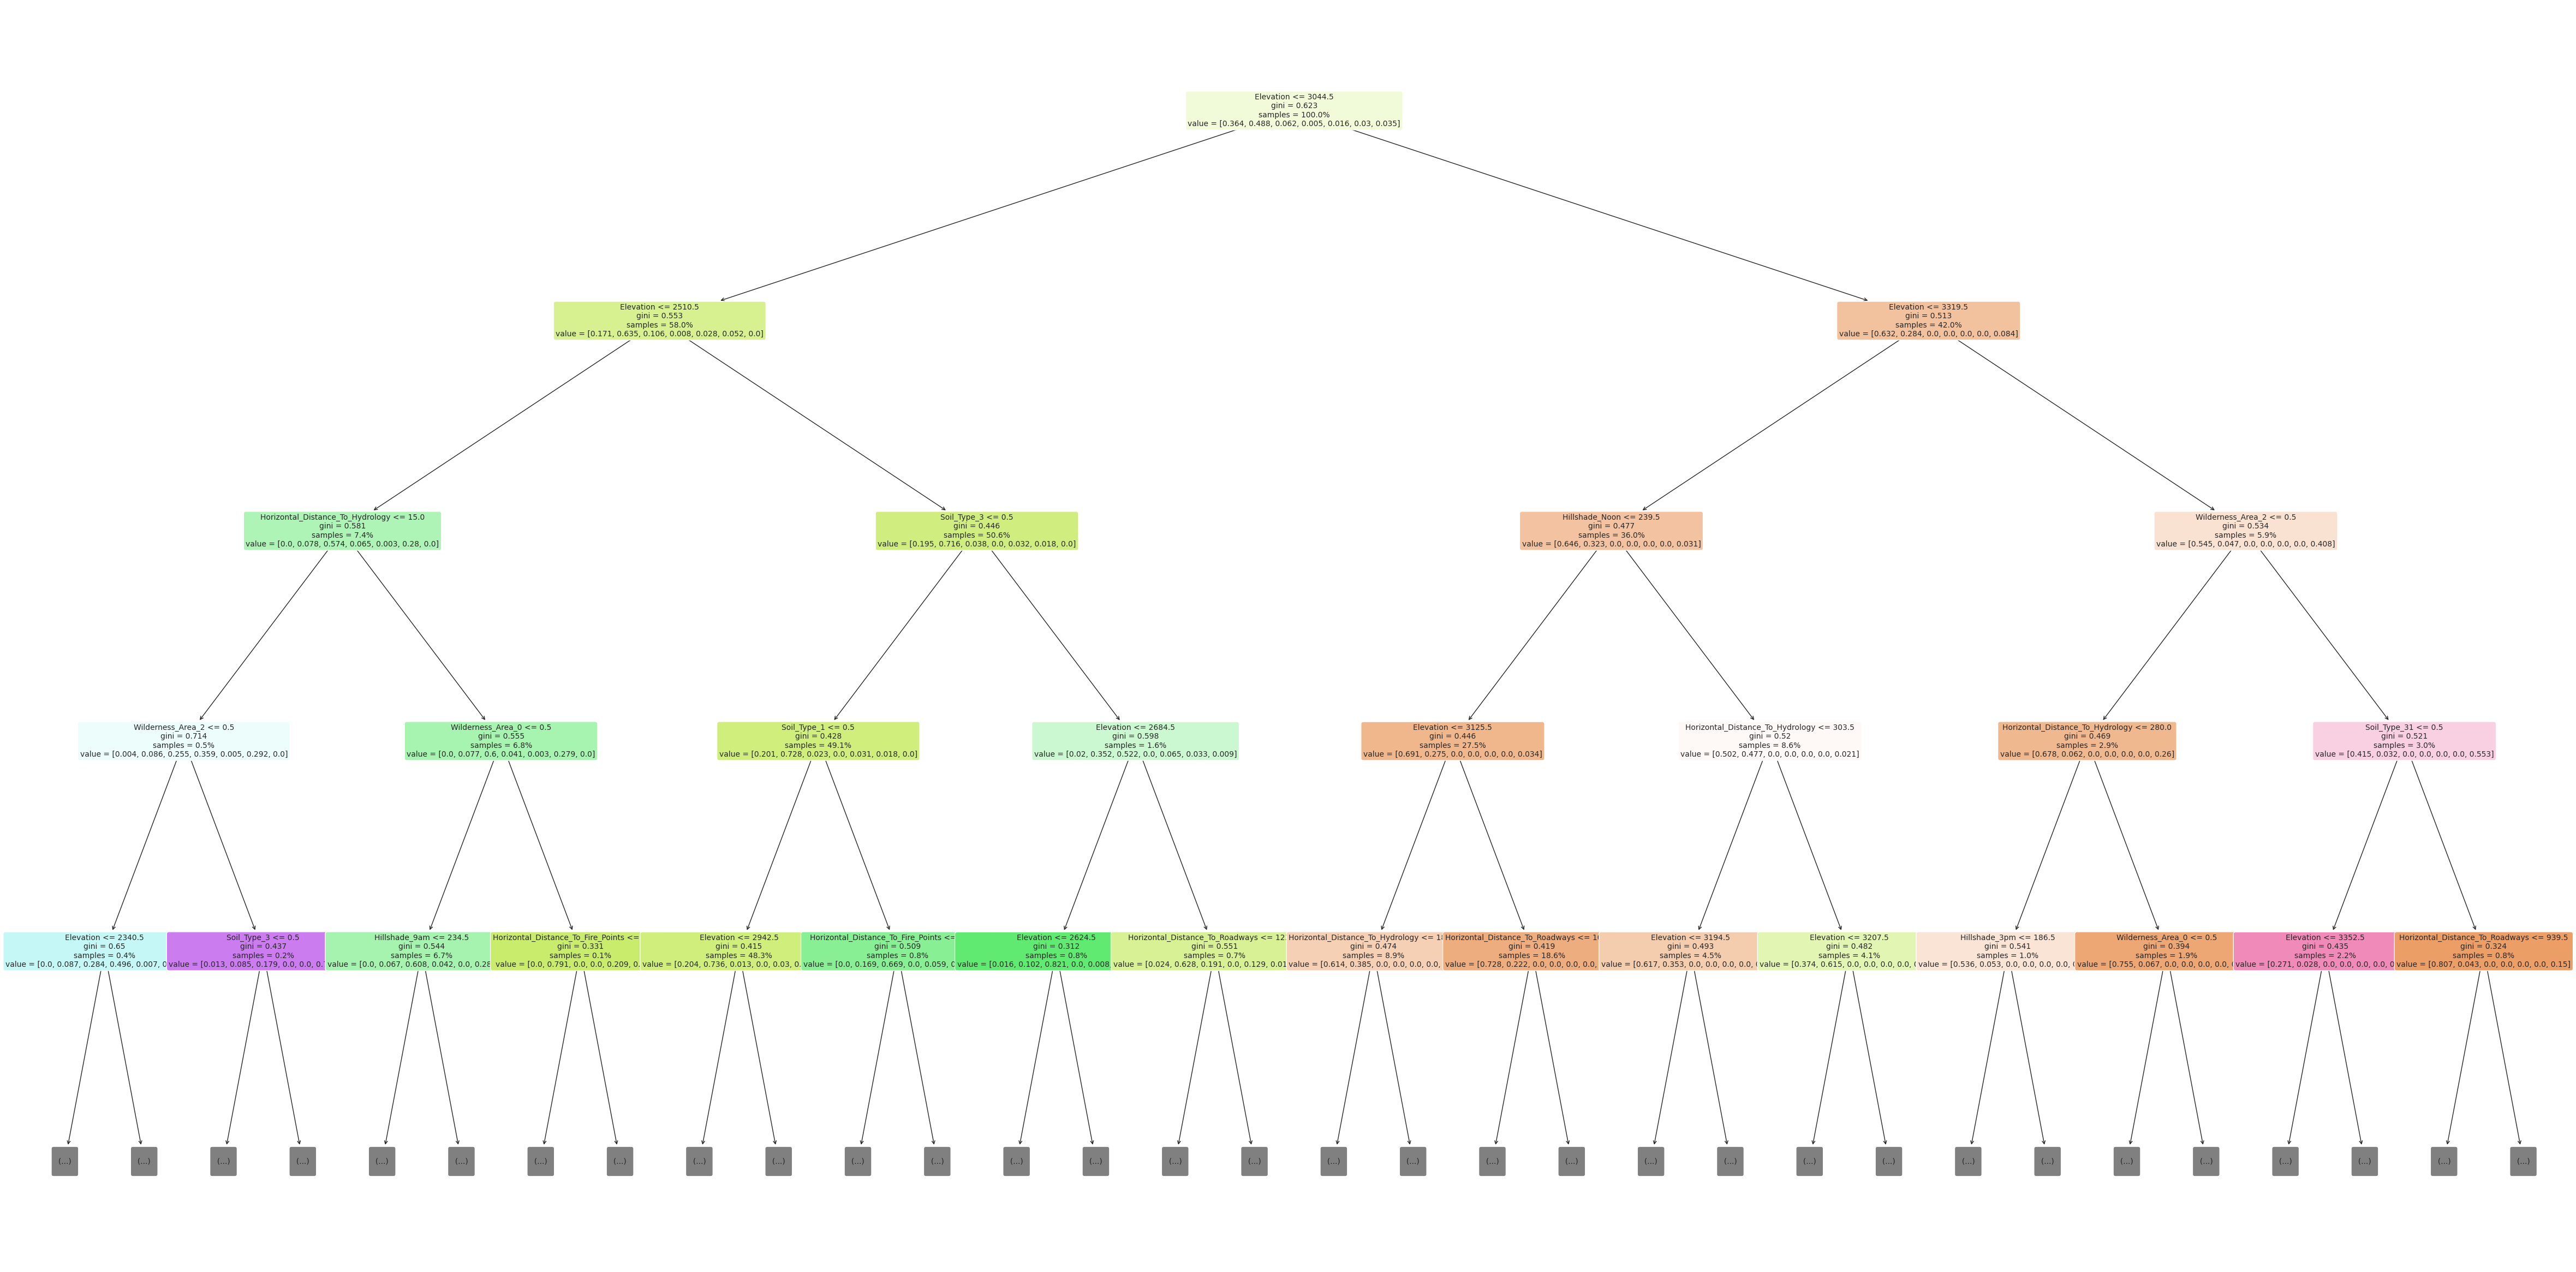

In [ ]:
plt.figure(figsize=(60,30))
plot_tree(dt1, max_depth=4, filled=True , fontsize=10,feature_names=features, rounded=True, proportion=True)

##بخش دوم

Text(0.5, 1.0, 'Confusion Matrix for Test data')

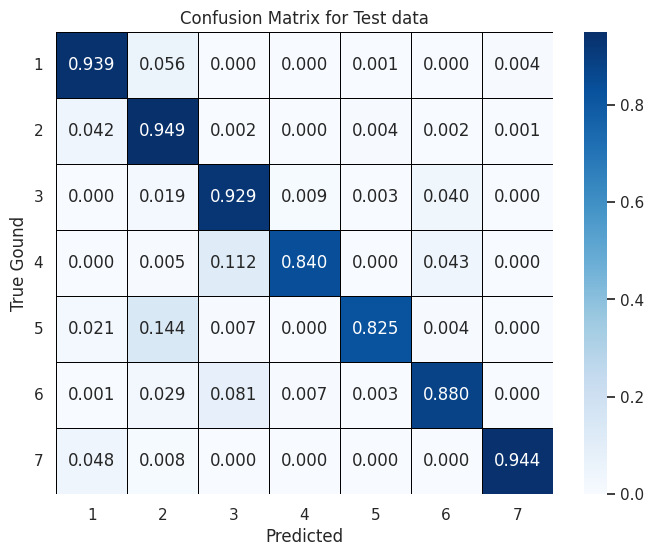

In [ ]:
# محاسبه ماتریس درهم‌ریختگی
hat = dt1.predict(x_test)
cm_1 = confusion_matrix(y_test, hat)
cm_sum = np.sum(cm_1, axis=1).reshape(-1, 1)

# نرمال‌سازی
cm = cm_1 / cm_sum

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.3f', cbar=True, linewidths=.5, linecolor='black');
plt.xticks(np.array(range(0, 7)).astype('float32') + 0.5, range(1, 8));
plt.yticks(np.array(range(0, 7)).astype('float32') + 0.5, range(1, 8), rotation=0);
plt.xlabel('Predicted')
plt.ylabel('True Gound')
plt.title('Confusion Matrix for Test data')

In [ ]:
# محاسبه دقت کلی
overall_accuracy = np.trace(cm) / float(np.sum(cm))

# محاسبه دقت، یادآوری و امتیاز F1 برای هر کلاس
class_metrics = classification_report(y_test, hat, output_dict=True)

# حلقه برای محاسبه و چاپ متریک‌ها
m_dic = {'class':[], 'precision':[],  'recall':[],  'f1_score':[]}
for c in np.unique(y_test):
    class_d = class_metrics[str(c)]
    per = class_d['precision']
    f1 = class_d['f1-score']
    rec = class_d['recall']

    m_dic['class'].append(str(c))
    m_dic['precision'].append(np.round(per, 4))
    m_dic['recall'].append(np.round(rec, 4))
    m_dic['f1_score'].append(np.round(f1, 4))

# ایجاد DataFrame برای متریک‌ها
mdf = pd.DataFrame(m_dic)

# تنظیم استایل برای زیبایی بیشتر
styled_mdf = mdf.style.set_table_attributes('style="width: 80%; margin: auto; border-collapse: collapse;"') \
                      .set_caption('Classification Metrics') \
                      .set_properties(**{'text-align': 'center'}) \
                      .format({'precision': '{:.4f}', 'recall': '{:.4f}', 'f1_score': '{:.4f}'}) \
                      .background_gradient(cmap='Blues')

# نمایش DataFrame استایل‌دهی شده
styled_mdf

,class,precision,recall,f1_score
0,1,0.9384,0.9391,0.9388
1,2,0.9483,0.9488,0.9486
2,3,0.9303,0.9289,0.9296
3,4,0.8312,0.8397,0.8354
4,5,0.8467,0.8247,0.8355
5,6,0.8790,0.8800,0.8795
6,7,0.9460,0.9441,0.9450


In [ ]:
main_model = DecisionTreeClassifier(max_depth=20, min_samples_split=20, min_samples_leaf=20, max_features=20, random_state=84 )

import tqdm
# Max depth
acc_md = []
hyper_md = np.arange(1,50,1)
pbar = tqdm.tqdm(hyper_md)
for i in pbar:
    test_model_md  = clone(main_model)
    test_model_md.max_depth = i
    test_model_md.fit(x_train_scaled, y_train)
    score = test_model_md.score(x_test_scaled, y_test)
    acc_md.append(score)

# Mininum sapmles split
acc_mss = []
hyper_mss = np.arange(1500,50,-10)
pbar = tqdm.tqdm(hyper_mss)
for i in pbar:
    test_model_mss = clone(main_model)
    test_model_mss.min_samples_split = i
    test_model_mss.fit(x_train_scaled, y_train)
    score = test_model_mss.score(x_test_scaled, y_test)
    acc_mss.append(score)

# Minimum samples leaf
acc_msl = []
hyper_msl = np.arange(1000,10,-5)
pbar = tqdm.tqdm(hyper_msl)
for i in pbar:
    test_model_msl = clone(main_model)
    test_model_msl.min_samples_leaf = i
    test_model_msl.fit(x_train_scaled, y_train)
    score = test_model_msl.score(x_test_scaled, y_test)
    acc_msl.append(score)

100%|██████████| 198/198 [12:58<00:00,  3.93s/it]


##بخش سوم

#سوال 4

In [ ]:
!pip install --upgrade --no-cach-dir gdown
! gdown 1oV8j0E0MjZ92oeITtIbJjOF8WvDsn_5J


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From: https://drive.google.com/uc?id=1oV8j0E0MjZ92oeITtIbJjOF8WvDsn_5J
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 6.94MB/s]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/HW2/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
number_of_ones = y.sum()
print(f'Number of class one data: {number_of_ones}')
print(f'Number of class zeros data: {len(y) - number_of_ones}')

Number of class one data: 526
Number of class zeros data: 499


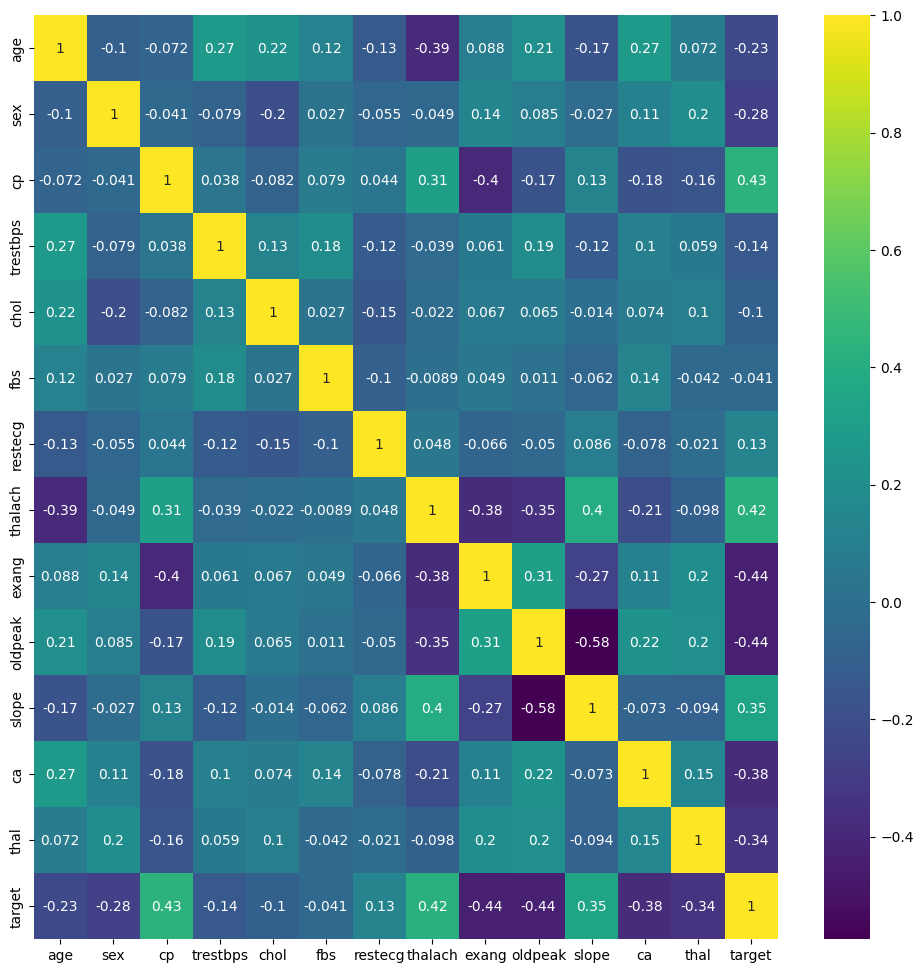

In [ ]:
plt.rcParams["figure.figsize"] = (12, 12)
cor = df.corr()
fig, ax = plt.subplots()
ax = sns.heatmap(cor, annot=True, cmap="viridis")


Confusion Matrix:
[[75 30]
 [14 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       105
           1       0.74      0.86      0.80       100

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.78       205
weighted avg       0.79      0.79      0.78       205



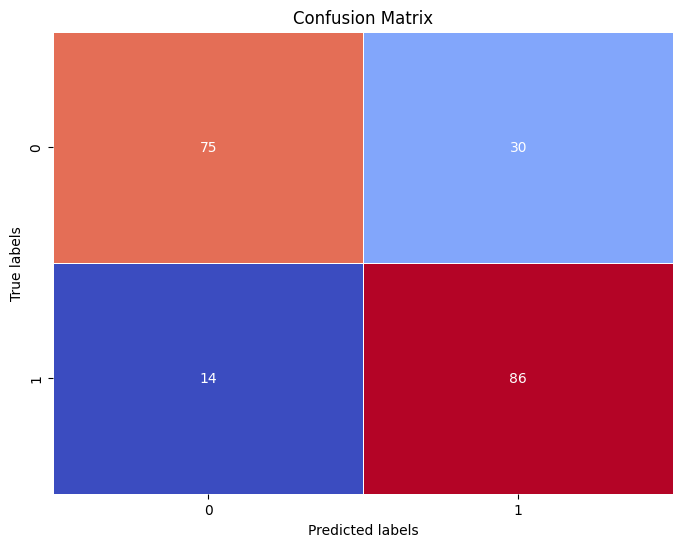

In [ ]:
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, digits=2, zero_division=1)
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=0.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**برای انتخاب بهترین تعداد فیچر:**

In [ ]:
import random

def process_and_train(df, threshold=0.25):
    # Calculate the correlation of each feature with the label
    correlations = df.corr()['target'][:-1]  # Exclude the correlation of Y with itself

    # Get the absolute value of correlations
    abs_correlations = correlations.abs()

    # Sort the correlations by absolute value in descending order
    sorted_correlations = abs_correlations.sort_values(ascending=False)

    # Print the sorted correlations
    print("Correlation of each feature with the label:")
    print(sorted_correlations)

    # Define a threshold for relevance, e.g., keep features with correlation > threshold
    relevant_features = sorted_correlations[sorted_correlations > threshold].index.tolist()

    # Print the most relevant features
    print("Most relevant features based on correlation:")
    print(relevant_features)

    # Select relevant features
    x_new = df[relevant_features]
    y_new = df['target']

    # Splitting the dataset into the Training set and Test set
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=84)

    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_new = scaler.fit_transform(X_train_new)
    X_test_new = scaler.transform(X_test_new)

    # Create and train Gaussian Naive Bayes classifier
    classifier = GaussianNB()
    classifier.fit(X_train_new, y_train_new)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test_new)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test_new, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Classification Report
    class_report = classification_report(y_test_new, y_pred, digits=2, zero_division=1)
    print("\nClassification Report:")
    print(class_report)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=0.5)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Set the random seed
    random.seed(84)

    # Randomly select 5 indices from the test set
    random_indices = random.sample(range(len(X_test_new)), 5)

    print("Randomly selected 5 data points:")
    for idx in random_indices:
        print(f"Index: {idx}")
        print(f"Actual Output: {y_test_new.iloc[idx]}")
        print(f"Predicted Output: {y_pred[idx]}")
        print()

چک کردن حالت های مختلف :

Correlation of each feature with the label:
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64
Most relevant features based on correlation:
['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age']
Confusion Matrix:
[[76 29]
 [14 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       105
           1       0.75      0.86      0.80       100

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



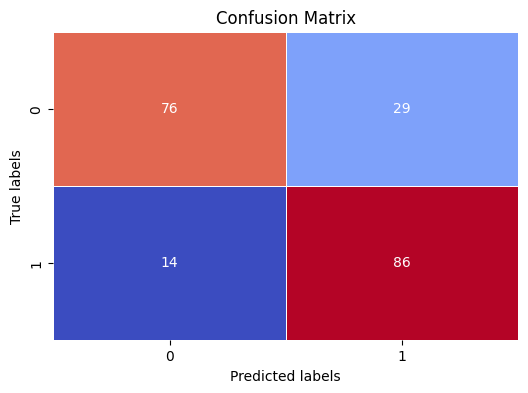

Randomly selected 5 data points:
Index: 187
Actual Output: 1
Predicted Output: 1

Index: 72
Actual Output: 0
Predicted Output: 0

Index: 198
Actual Output: 0
Predicted Output: 1

Index: 9
Actual Output: 0
Predicted Output: 1

Index: 125
Actual Output: 0
Predicted Output: 0



In [ ]:
process_and_train(df, threshold=0.15)

Correlation of each feature with the label:
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64
Most relevant features based on correlation:
['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age']
Confusion Matrix:
[[76 29]
 [14 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       105
           1       0.75      0.86      0.80       100

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



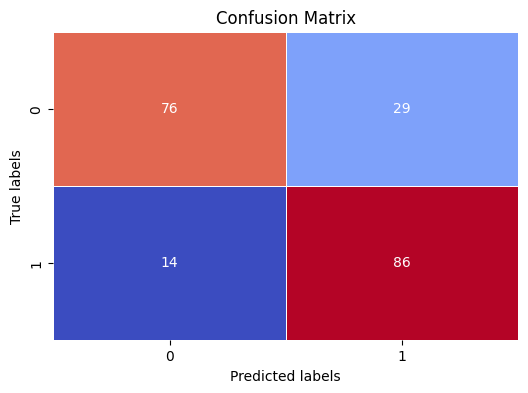

Randomly selected 5 data points:
Index: 187
Actual Output: 1
Predicted Output: 1

Index: 72
Actual Output: 0
Predicted Output: 0

Index: 198
Actual Output: 0
Predicted Output: 1

Index: 9
Actual Output: 0
Predicted Output: 1

Index: 125
Actual Output: 0
Predicted Output: 0



In [ ]:
process_and_train(df, threshold=0.2)

Correlation of each feature with the label:
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64
Most relevant features based on correlation:
['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex']
Confusion Matrix:
[[79 26]
 [12 88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       105
           1       0.77      0.88      0.82       100

    accuracy                           0.81       205
   macro avg       0.82      0.82      0.81       205
weighted avg       0.82      0.81      0.81       205



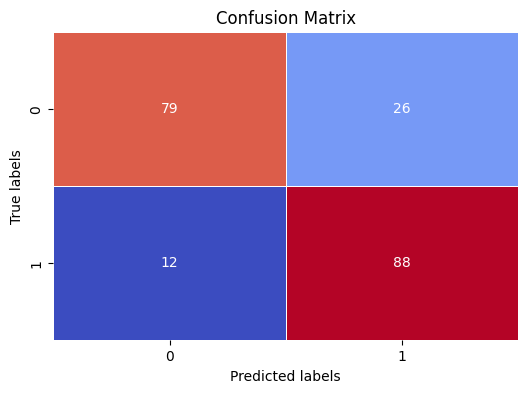

Randomly selected 5 data points:
Index: 187
Actual Output: 1
Predicted Output: 1

Index: 72
Actual Output: 0
Predicted Output: 0

Index: 198
Actual Output: 0
Predicted Output: 1

Index: 9
Actual Output: 0
Predicted Output: 1

Index: 125
Actual Output: 0
Predicted Output: 0



In [ ]:
process_and_train(df, threshold=0.25)

Correlation of each feature with the label:
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64
Most relevant features based on correlation:
['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal']
Confusion Matrix:
[[78 27]
 [15 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       105
           1       0.76      0.85      0.80       100

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.79       205
weighted avg       0.80      0.80      0.79       205



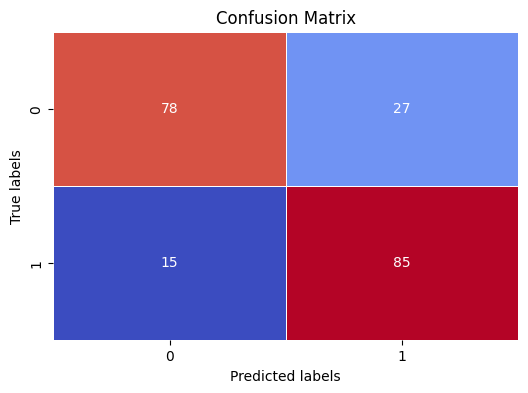

Randomly selected 5 data points:
Index: 187
Actual Output: 1
Predicted Output: 1

Index: 72
Actual Output: 0
Predicted Output: 0

Index: 198
Actual Output: 0
Predicted Output: 1

Index: 9
Actual Output: 0
Predicted Output: 1

Index: 125
Actual Output: 0
Predicted Output: 0



In [ ]:
process_and_train(df, threshold=0.3)

Correlation of each feature with the label:
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64
Most relevant features based on correlation:
['oldpeak', 'exang', 'cp', 'thalach', 'ca']
Confusion Matrix:
[[75 30]
 [16 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.77       105
           1       0.74      0.84      0.79       100

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.77       205



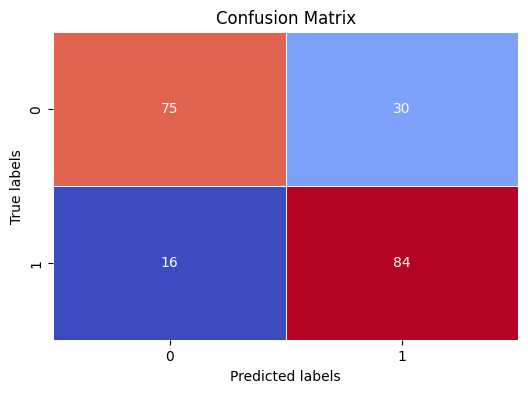

Randomly selected 5 data points:
Index: 187
Actual Output: 1
Predicted Output: 1

Index: 72
Actual Output: 0
Predicted Output: 0

Index: 198
Actual Output: 0
Predicted Output: 1

Index: 9
Actual Output: 0
Predicted Output: 0

Index: 125
Actual Output: 0
Predicted Output: 0



In [ ]:
process_and_train(df, threshold=0.35)

Correlation of each feature with the label:
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64
Most relevant features based on correlation:
['oldpeak', 'exang', 'cp', 'thalach']
Confusion Matrix:
[[70 35]
 [18 82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       105
           1       0.70      0.82      0.76       100

    accuracy                           0.74       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.74      0.74       205



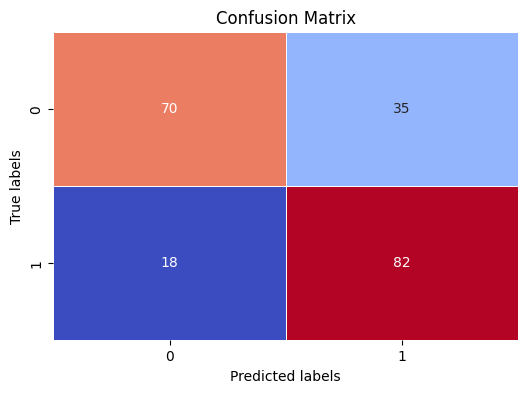

Randomly selected 5 data points:
Index: 187
Actual Output: 1
Predicted Output: 1

Index: 72
Actual Output: 0
Predicted Output: 0

Index: 198
Actual Output: 0
Predicted Output: 1

Index: 9
Actual Output: 0
Predicted Output: 1

Index: 125
Actual Output: 0
Predicted Output: 0



In [ ]:
process_and_train(df, threshold=0.4)